# 2. Modelling

In [11]:
import pandas as pd

train_cat = pd.read_pickle('train_cat.pkl')
train_sol = pd.read_pickle('train_sol.pkl')
train_qnt = pd.read_pickle('train_qnt.pkl')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [18]:
# Step 0: Define the columns

drop_cols = [
    'Basic_Demos_Enroll_Year',
    'Basic_Demos_Study_Site',
    'MRI_Track_Scan_Location'
]

onehot_cols = [
    'PreInt_Demos_Fam_Child_Ethnicity',
    'PreInt_Demos_Fam_Child_Race'
]

label_cols = [
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

# Step 1: Preprocess Categorical Data
train_cat_clean = train_cat.drop(columns=drop_cols)

label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    train_cat_clean[col] = le.fit_transform(train_cat_clean[col].astype(str))
    label_encoders[col] = le

train_cat_encoded = pd.get_dummies(train_cat_clean, columns=onehot_cols, drop_first=True)

# Step 2: Merge with quantitative using participant_id
merged = pd.merge(train_cat_encoded, train_qnt, on='participant_id', how='inner')


# Step 3: Drop participant_id (optional if not needed for modeling)
merged = merged.drop(columns=['participant_id'])

# Step 4: Normalize quantitative columns
quantitative_cols = train_qnt.columns.drop('participant_id')
scaler = StandardScaler()
merged[quantitative_cols] = scaler.fit_transform(merged[quantitative_cols])

# Final processed dataset
X_all = merged


In [20]:
X_all.head()


,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,PreInt_Demos_Fam_Child_Ethnicity_1.0,PreInt_Demos_Fam_Child_Ethnicity_2.0,PreInt_Demos_Fam_Child_Ethnicity_3.0,PreInt_Demos_Fam_Child_Race_1.0,PreInt_Demos_Fam_Child_Race_2.0,PreInt_Demos_Fam_Child_Race_3.0,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,4,8,8,10,True,False,False,False,False,False,...,0.461335,0.738289,0.777392,0.823382,0.324039,0.879710,0.403414,-0.127554,0.601126,0.936882
1,4,8,8,10,True,False,False,False,False,False,...,0.461335,0.738289,0.777392,0.823382,0.324039,0.879710,0.403414,-0.127554,0.601126,0.936882
2,4,0,4,8,False,False,False,False,False,False,...,1.450291,1.196661,0.777392,1.305658,0.324039,0.879710,0.688018,0.351171,0.134399,NaN
3,4,0,4,8,False,False,False,False,False,False,...,1.450291,1.196661,0.777392,1.305658,0.324039,0.879710,0.688018,0.351171,0.134399,NaN
4,7,0,8,10,True,False,False,False,True,False,...,0.461335,1.807824,2.162371,0.582244,2.101622,0.525216,2.680244,2.266070,-0.332328,0.686069


In [21]:
# Step 1: Calculate the correlation matrix
correlation_matrix = X_all.corr()

# Step 2: Identify highly correlated features
correlation_threshold = 0.9  # Set the threshold for correlation
high_corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

# Step 3: Drop highly correlated features
X_all_reduced = X_all.drop(columns=high_corr_features)


,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,PreInt_Demos_Fam_Child_Ethnicity_1.0,PreInt_Demos_Fam_Child_Ethnicity_2.0,PreInt_Demos_Fam_Child_Ethnicity_3.0,PreInt_Demos_Fam_Child_Race_1.0,PreInt_Demos_Fam_Child_Race_2.0,PreInt_Demos_Fam_Child_Race_3.0,...,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,4,8,8,10,True,False,False,False,False,False,...,0.460706,0.461335,0.738289,0.777392,0.823382,0.324039,0.403414,-0.127554,0.601126,0.936882
1,4,8,8,10,True,False,False,False,False,False,...,0.460706,0.461335,0.738289,0.777392,0.823382,0.324039,0.403414,-0.127554,0.601126,0.936882
2,4,0,4,8,False,False,False,False,False,False,...,1.309671,1.450291,1.196661,0.777392,1.305658,0.324039,0.688018,0.351171,0.134399,NaN
3,4,0,4,8,False,False,False,False,False,False,...,1.309671,1.450291,1.196661,0.777392,1.305658,0.324039,0.688018,0.351171,0.134399,NaN
4,7,0,8,10,True,False,False,False,True,False,...,0.743694,0.461335,1.807824,2.162371,0.582244,2.101622,2.680244,2.266070,-0.332328,0.686069


In [28]:
print(high_corr_features)

{'SDQ_SDQ_Hyperactivity'}


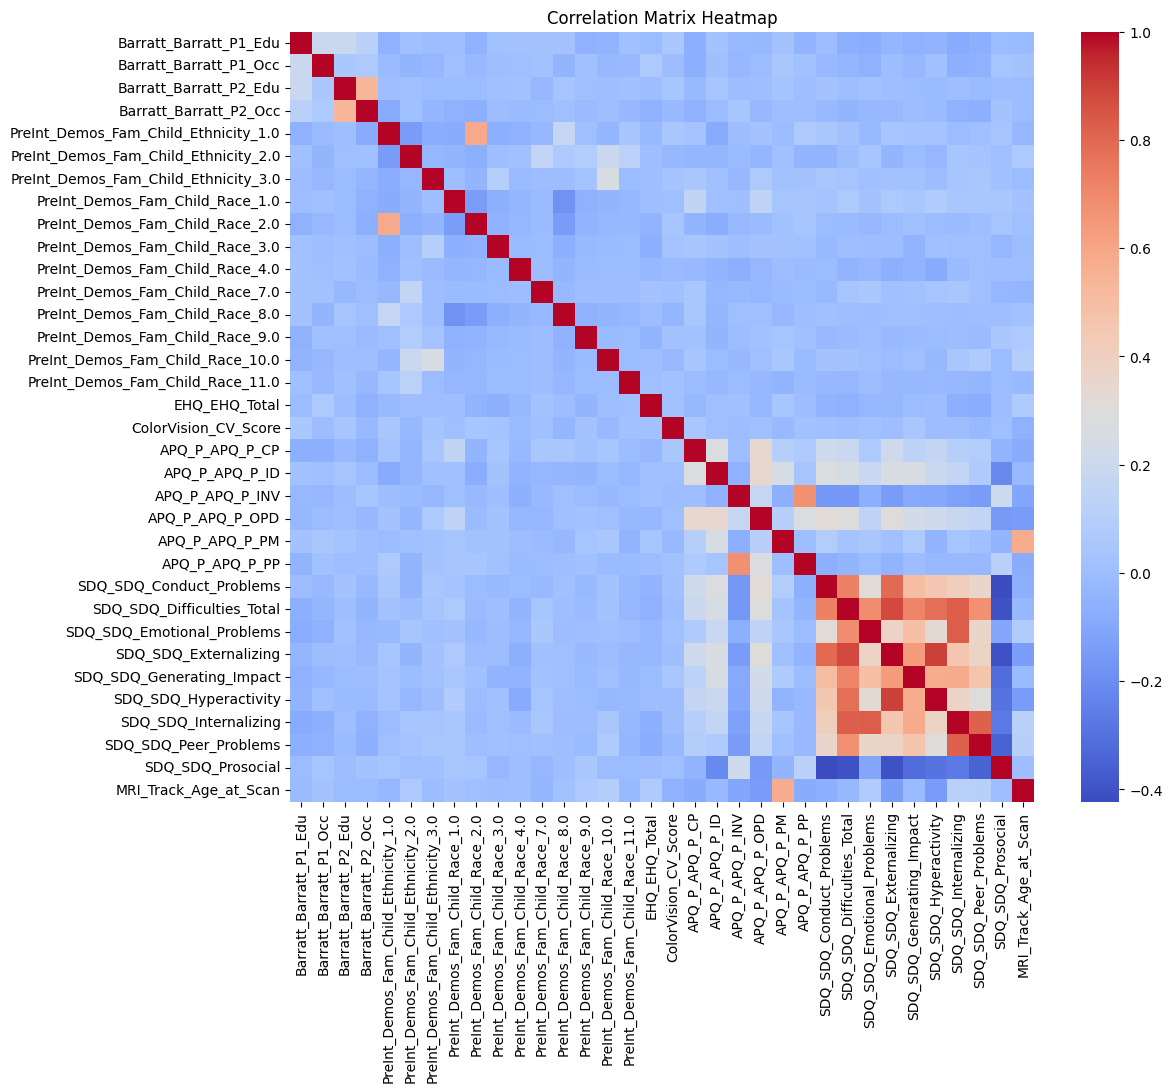

In [22]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [24]:
y_adhd = train_sol["ADHD_Outcome"]
y_sex = train_sol["Sex_F"]

In [31]:
# Split the data into train and test sets & impute missing values

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LassoCV
import numpy as np

SEED = 42

train_combined = X_all_reduced.sample(frac=0.8, random_state=SEED)
test_combined = X_all_reduced.drop(train_combined.index)

# Ensure the same columns are present in both sets
train_combined = train_combined.reindex(columns=X_all_reduced.columns, fill_value=0)
test_combined = test_combined.reindex(columns=X_all_reduced.columns, fill_value=0)

# Convert to numpy arrays
train_combined = train_combined.values
test_combined = test_combined.values   

# Convert to float32 for compatibility with IterativeImputer
##train_combined = train_combined.astype(np.float32)
#test_combined = test_combined.astype(np.float32)

# Impute missing values using IterativeImputer with Lasso
imputer = IterativeImputer(estimator=LassoCV(random_state=SEED), max_iter=5, random_state=SEED)
train_combined[:] = imputer.fit_transform(train_combined)
test_combined[:] = imputer.transform(test_combined)


/Users/HEY/WiDS2025/wids/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.430e-02, tolerance: 7.984e-04
  model = cd_fast.enet_coordinate_descent(
/Users/HEY/WiDS2025/wids/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.249e-01, tolerance: 3.834e-01
  model = cd_fast.enet_coordinate_descent(
/Users/HEY/WiDS2025/wids/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

In [ ]:
# Check correlation with target variable

# Compute the correlation matrix including 'Sex_F'
correlation_matrix = X_all.corr()

# Extract correlations of features with respect to 'Sex_F'
correlation_with_sex = correlation_matrix['Sex_F'].drop('Sex_F').sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_sex.index, y=correlation_with_sex.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation with Sex_F")
plt.title("Feature Correlations with Sex (Sex_F)")
plt.show()

# Display numerical correlation values
correlation_with_sex

In [ ]:
# Correlation between X_all and y_adhd
correlation_with_adhd = X_all.corrwith(y_adhd)

# Correlation between X_all and y_sex
correlation_with_sex = X_all.corrwith(y_sex)

# Display the results
#print("Correlation with y_adhd:")
#print(correlation_with_adhd.sort_values(ascending=False))

#print("\nCorrelation with y_sex:")
#print(correlation_with_sex.sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_sex.index, y=correlation_with_sex.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation with Sex_F")
plt.title("Feature Correlations with Sex (Sex_F)")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_adhd.index, y=correlation_with_sex.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Correlation with Sex_F")
plt.title("Feature Correlations with Sex (Sex_F)")
plt.show()